# Table of Contents

- [Gathering](#Gathering)
- [Assessing](#Assessing)
- [Observations](#Observations)
- [Cleaning](#Cleaning)
- [Visualizations](#Visualizations)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from PIL import Image
import os
import re
import json
import requests as rq
%matplotlib inline
import tweepy as tw
from sqlalchemy import create_engine
from io import BytesIO
#remove columns display limit
pd.options.display.max_columns = None
#remove cell display limit
pd.set_option('display.max_colwidth', -1)


***

# Gathering

In [2]:
#load twitter archive csv file
archive_df = pd.read_csv('sources/twitter-archive-enhanced.csv')


In [3]:
# Downloading and loading the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)
file_name = url.split('/')[-1]

if not os.path.isfile(file_name):
    with open(os.path.join('sources/' + file_name), 'wb') as file:
        file.write(response.content)

img_df = pd.read_csv('sources/image-predictions.tsv', sep='\t')


In [4]:
#download and load data from twitter API 
api_list = []

with open('sources/tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        api_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(api_list)
api_df


,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889
5,20562,3261,891087950875897856,3200889
6,12041,2158,890971913173991426,3200889
7,56848,16716,890729181411237888,3200889
8,28226,4429,890609185150312448,3200889
9,32467,7711,890240255349198849,3200889


***

# Assessing

### A.twitter_archive_enhanced file assesment

In [5]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [6]:
archive_df.info()
archive_df.expanded_urls.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

59

In [7]:
archive_df.name.value_counts()

None          745
a             55 
Charlie       12 
Oliver        11 
Lucy          11 
Cooper        11 
Tucker        10 
Penny         10 
Lola          10 
Bo            9  
Winston       9  
Sadie         8  
the           8  
Toby          7  
Daisy         7  
Buddy         7  
Bailey        7  
an            7  
Oscar         6  
Stanley       6  
Leo           6  
Bella         6  
Scout         6  
Jax           6  
Milo          6  
Koda          6  
Jack          6  
Dave          6  
Rusty         6  
Larry         5  
             ..  
Marlee        1  
Pherb         1  
Brandi        1  
Fillup        1  
Kramer        1  
Geoff         1  
Florence      1  
Dante         1  
Mason         1  
Teddy         1  
Todo          1  
Diogi         1  
Sandra        1  
Alexander     1  
Brandonald    1  
Odin          1  
Banditt       1  
Sparky        1  
Angel         1  
Mingus        1  
Striker       1  
Georgie       1  
Bruiser       1  
Divine        1  
Rumpole   

In [8]:
archive_df.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [9]:
archive_df.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

### B.image_predictions file assesment

In [10]:
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### C.twitter_json.txt file assesment

In [12]:
api_df

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889
5,20562,3261,891087950875897856,3200889
6,12041,2158,890971913173991426,3200889
7,56848,16716,890729181411237888,3200889
8,28226,4429,890609185150312448,3200889
9,32467,7711,890240255349198849,3200889


In [13]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


***

In [14]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Summary

### Quality

### archive_df:
    1-Columns `doggo`, `floofer`, `pupper`, `puppo` has `None` for missing values.
    2-`expanded_urls` has `NaN` values.
    3-`rating_numerator` column should of type `float` and also it should be correctly extracted.
    4-`rating_denominator` column has values less than 10 and values more than 10 for ratings more than one.
    5-`text` column has some repeated data.
    6-`timestamp` need to be converted to `datetime`.
    7-Remove retweets and replys since we are intersted only in the tweets themselves.
    8-`name` has invalid values.

### img_df:
    9-`img_num` is useless
    
### api_df:
    10-only get the desired colums.
    11-`id` need to be renamed


### Tidiness

### archive_df:
    1-Columns (doggo, floofer, pupper, puppo) are all about the same data. (dog_stage)

### img_df:
    2-Columns (p1, p2, p3),
              (p1_conf, p2_conf, p3_conf),
              (p1_dog, p2_dog, p3_dog)
               has non-descriptive names and each line is about the same data.(confidence, breed)

### Overall:
    3-all data sets should be combiened into 1 dataset (twitter_archive_master.db)


# Cleaning

### Creating copies of our DataFrames

In [15]:
archive_df_cleaned = archive_df.copy()
img_df_cleaned= img_df.copy()
api_df_cleaned = api_df.copy()

### Define
Extract the correct values of `rating`

### Code

In [16]:
archive_df_cleaned[archive_df_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

ipykernel_launcher:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [17]:
correct_ratings = archive_df_cleaned[archive_df_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")].text.str.extract((r"(\d+\.\d*(?=\/\d+))"))
correct_ratings

ipykernel_launcher:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [18]:
# Assign the correct values to the targeted indecies 
archive_df_cleaned.loc[correct_ratings.index, 'rating_numerator'] = correct_ratings.values

In [19]:
#convet the column to float
archive_df_cleaned.rating_numerator = archive_df_cleaned.rating_numerator.astype('float')

### Test

In [20]:
archive_df_cleaned.rating_numerator.dtype

dtype('float64')

In [21]:
archive_df_cleaned.loc[correct_ratings.index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,9.50,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,None,None,None,None


In [22]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

### Define
Replace 'None' with `np.nan` for Columns (`doggo`, `floofer`, `pupper`, `puppo`).

### Code


In [23]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']
for c in col_list:
    archive_df_cleaned[c] = archive_df_cleaned[c].replace('None', np.nan)

### Test

In [24]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(5), int64(2), object(

### Define
Remove ratings and links from `text` column using `RegEx`.

### Code

In [25]:
archive_df_cleaned.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [26]:
archive_df_cleaned.text = archive_df_cleaned.text.str.extract('(.+(?=\s\d+/\d+\s))')

### Test

In [27]:
archive_df_cleaned.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.                 
3    This is Darla. She commenced a snooze mid meal.                                                                                     
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such.          
Name: text, dtype: object

### Define
Remove ratings `NaN` entries from `expanded_url`.

### Code

In [28]:
archive_df_cleaned = archive_df_cleaned.loc[~archive_df_cleaned.expanded_urls.isnull()]

### Test

In [29]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2212 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null float64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         94 non-null object
floofer                       10 non-null object
pupper                        255 non-null object
puppo                         29 non-null object
dtypes: float64(5), int64(2), object(

### Define
Converting `timestampe` to datetime

### Code

In [30]:
archive_df_cleaned.timestamp = pd.to_datetime(archive_df_cleaned.timestamp)

### Test

In [31]:
archive_df_cleaned.timestamp.dtype

datetime64[ns, UTC]

### Define
Remove retweets and replies and drop unwanted columns

### Code

In [32]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns, UTC]
source                        2297 non-null object
text                          2212 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null float64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         94 non-null object
floofer                       10 non-null object
pupper                        255 non-null object
puppo                         29 non-null object
dtypes: datetime64[ns, U

In [33]:
archive_df_cleaned = archive_df_cleaned.query('retweeted_status_id == "NaN" &\
                                               retweeted_status_user_id =="NaN" &\
                                               in_reply_to_status_id =="NaN"&\
                                               in_reply_to_user_id == "NaN"')

In [34]:
# drop columns
cols = ['in_reply_to_status_id',
        'in_reply_to_user_id',
        'retweeted_status_id',
        'retweeted_status_user_id',
        'retweeted_status_timestamp']

archive_df_cleaned.drop(columns=cols, axis=1, inplace=True)

### Test

In [35]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns, UTC]
source                2094 non-null object
text                  2027 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null float64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 212.7+ KB


### Define
Remove invalid `rating_denominator`

### Code

In [36]:
archive_df_cleaned = archive_df_cleaned[archive_df_cleaned.rating_denominator == 10]

### Test

In [37]:
archive_df_cleaned.rating_numerator.unique().astype('int')

array([  13,   12,   14,   13,   11,    6,   10,    0,    9,    5,   11,
          3,    7,    8,    9,    4, 1776,   11,    2,    1,  420])

In [38]:
archive_df_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2077.000000,2077.0
mean,11.657573,10.0
std,39.818470,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


### Define
Remove any non-dog related tweet

### Code

In [39]:
archive_df_cleaned = archive_df_cleaned[~archive_df_cleaned.text.isnull()]
archive_df_cleaned = archive_df_cleaned[~archive_df_cleaned.text.str.match('.*only rate dogs')]

### Test

In [40]:
(archive_df_cleaned.text.isnull().sum(), archive_df_cleaned.text.str.match('.*only rate dogs').sum())

(0, 0)

In [41]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null datetime64[ns, UTC]
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1961 non-null object
doggo                 82 non-null object
floofer               10 non-null object
pupper                224 non-null object
puppo                 23 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(8)
memory usage: 199.2+ KB


### Define
Create `dog_stage` column and remove the (`doggo`, `floofer`, `pupper`, `puppo`) columns.

### Code

In [42]:
# select the dog stages columns from the dataset
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
archive_df_cleaned['dog_stage'] = archive_df_cleaned[cols].apply(lambda x: '_'.join(x.dropna().astype(str)), axis=1)
# replace the empty string with nan and change datatype to category
archive_df_cleaned.dog_stage = archive_df_cleaned.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns    
archive_df_cleaned.drop(columns = cols, axis =1, inplace=True)

### Test

In [43]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null datetime64[ns, UTC]
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1961 non-null object
dog_stage             328 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 140.2+ KB


In [44]:
archive_df_cleaned.dog_stage.value_counts()

pupper           215
doggo            71 
puppo            22 
floofer          9  
doggo_pupper     9  
doggo_puppo      1  
doggo_floofer    1  
Name: dog_stage, dtype: int64

### Define
- Replace 'None' with np.name in archive_df_cleaned `name` column.
- Remove any rows with invalid names which starts with lowercase.


### Code

In [45]:
# Getting all the invalid names
archive_df_cleaned[archive_df_cleaned.name.str.islower()].name.unique()

array(['such', 'a', 'not', 'one', 'my', 'his', 'actually', 'just', 'mad',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space', 'an', 'quite'], dtype=object)

In [46]:
# Replacing with np.nan
archive_df_cleaned.replace(['such', 'a', 'not', 'one', 'my', 'his', 'actually', 'just', 'mad',
       'this', 'all', 'old', 'infuriating', 'the', 'by', 'officially',
       'life', 'light', 'space', 'an', 'quite', 'None'], np.nan, inplace=True)

### Test

In [47]:
archive_df_cleaned.name.dropna().str.islower().unique()

array([False])

In [48]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null datetime64[ns, UTC]
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1362 non-null object
dog_stage             328 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 140.2+ KB


### Define
Removing `img_num` from img_df_cleaned

### Code

In [49]:
img_df_cleaned.drop(columns='img_num', axis=1, inplace=True)

### Test

In [50]:
img_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


### Define
Reshaping img_df_cleaned with related columns combined and given descriptive names

### Code

In [51]:
# looping through each row and get the hieghst prediction
breed = []
confidence = []
for index, row in img_df_cleaned.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)

img_df_cleaned['breed'] = breed
img_df_cleaned['confidence'] = confidence

In [52]:
### Remove unnecessary columns
img_df_cleaned = img_df_cleaned[['tweet_id', 'jpg_url', 'breed', 'confidence']]

### Test

In [53]:
img_df_cleaned

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,NaN,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,NaN,NaN
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493


### Test

In [54]:
img_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
breed         1532 non-null object
confidence    1532 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


### Define
merge all the datasets into `all_df` and into sqllite database

### Code

In [55]:
all_df = pd.merge(archive_df_cleaned, img_df_cleaned, on='tweet_id')
all_df = pd.merge(all_df, api_df_cleaned, on ='tweet_id')

In [56]:
# Create SQLAlchemy Engine and empty twitter_master database
eng = create_engine('sqlite:///sources/twitter_archive_master.db')

# Store all_df into twitter_master table
try:
    all_df.to_sql('twitter_master', eng, index=False)
except Exception as e:
    print(e)

Table 'twitter_master' already exists.


### Test

In [57]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 0 to 1839
Data columns (total 15 columns):
tweet_id              1840 non-null int64
timestamp             1840 non-null datetime64[ns, UTC]
source                1840 non-null object
text                  1840 non-null object
expanded_urls         1840 non-null object
rating_numerator      1840 non-null float64
rating_denominator    1840 non-null int64
name                  1322 non-null object
dog_stage             296 non-null category
jpg_url               1840 non-null object
breed                 1356 non-null object
confidence            1356 non-null float64
favorite_count        1840 non-null int64
retweet_count         1840 non-null int64
user_count            1840 non-null int64
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(5), object(6)
memory usage: 217.8+ KB


In [58]:
master_df = pd.read_sql('select * from twitter_master', eng, parse_dates='timestamp')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 15 columns):
tweet_id              1840 non-null int64
timestamp             1840 non-null datetime64[ns]
source                1840 non-null object
text                  1840 non-null object
expanded_urls         1840 non-null object
rating_numerator      1840 non-null float64
rating_denominator    1840 non-null int64
name                  1322 non-null object
dog_stage             296 non-null object
jpg_url               1840 non-null object
breed                 1356 non-null object
confidence            1356 non-null float64
favorite_count        1840 non-null int64
retweet_count         1840 non-null int64
user_count            1840 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 215.7+ KB


***

# Visualization

- A bar chart showing the rating frequency

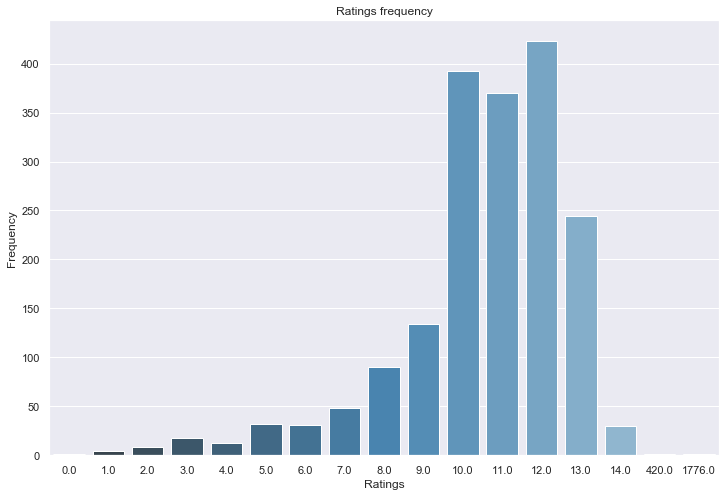

In [59]:
d = master_df.rating_numerator.value_counts()
x = d.index
y = d.values
fig, ax = plt.subplots(figsize=(12, 8))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

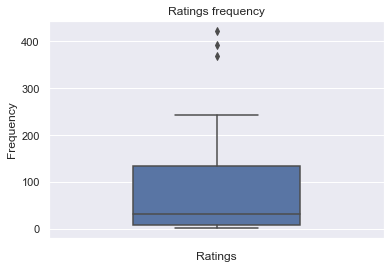

In [60]:
ax = sns.boxplot(d, orient='v', width=.5)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

- lets investigate our top 2 rating and get their data

In [61]:
top_df = master_df[master_df.rating_numerator > 400][['name', 'text', 'jpg_url', 'rating_numerator']]
top_df

,name,text,jpg_url,rating_numerator
682,Atticus,This is Atticus. He's quite simply America af.,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1776.0
1584,None,Good dogg.,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,420.0


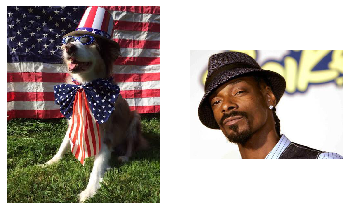

In [62]:
# save of the top 2 tweets the images into folder
if not os.path.exists('images'):
    os.makedirs('images')

fig = plt.figure()
c = 1
for ind, row in top_df.iterrows():
    req = rq.get(row['jpg_url'])
    img = Image.open(BytesIO(req.content))
    img.save('images/' + str(ind) + '_' + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c+=1
    plt.imshow(img)
    plt.axis('off')
plt.show()

- Here we can see that image of the `420` rating is an image of the famous rap singer `Snoop Dogg` and should be removed from the data. 

### Code

In [63]:
# Remove Snoop Dogg tweet from the data set
master_df.drop(index=1600, inplace=True)

### Test

In [64]:
master_df[master_df.rating_numerator == 420]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,favorite_count,retweet_count,user_count
1584,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Good dogg.,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10,None,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,None,NaN,7989,4324,3201008


- Next we can take a look to the relation between `retweet_count` and `favorite_count`

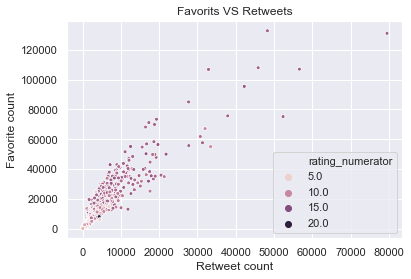

In [65]:
ax = sns.scatterplot(x='retweet_count', y='favorite_count', hue='rating_numerator', data=master_df,  hue_norm=(5, 20), s=15)
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

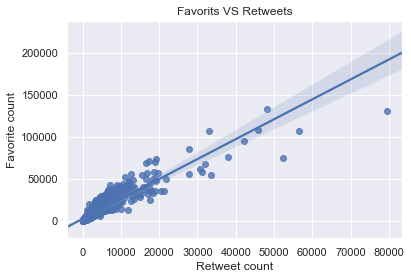

In [66]:
ax = sns.regplot(x='retweet_count', y='favorite_count', data=master_df)
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

- As we can see from the regression plot the `favorite_count` and `retweets` are highly postive correlated.

-lets take a look at `dog_stage`

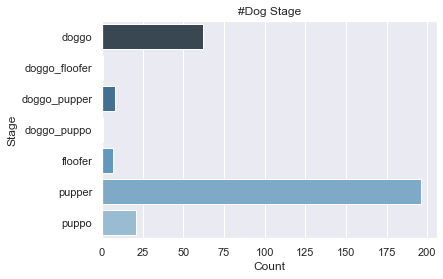

In [67]:
dogstage_df = master_df.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(x=dogstage_df.values, y=dogstage_df.index, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Stage', title='#Dog Stage')
plt.show()

- As we can see `pupper` stage is the most popular

-lets take a look at `breed`

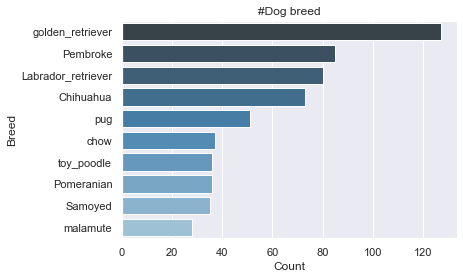

In [68]:
dogbreed_df = master_df.groupby('breed').tweet_id.count()
dogbreed_df.sort_values(ascending=False, inplace=True)
dogbreed_df = dogbreed_df.head(10)
ax = sns.barplot(x=dogbreed_df.values, y=dogbreed_df.index, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Breed', title='#Dog breed')
plt.show()

- As we know there is a lot of breeds in the data set here I got the top 10 breeds
- Hence, `golden_retriever` is the most popular

-Now we take a look at `avg_rating` along `timestamp`

In [74]:
master_df.rating_numerator.unique().astype('int')

array([  13,   12,   14,   11,    6,   10,    0,    5,    3,    7,    8,
          9,    4, 1776,    2,    1,  420])

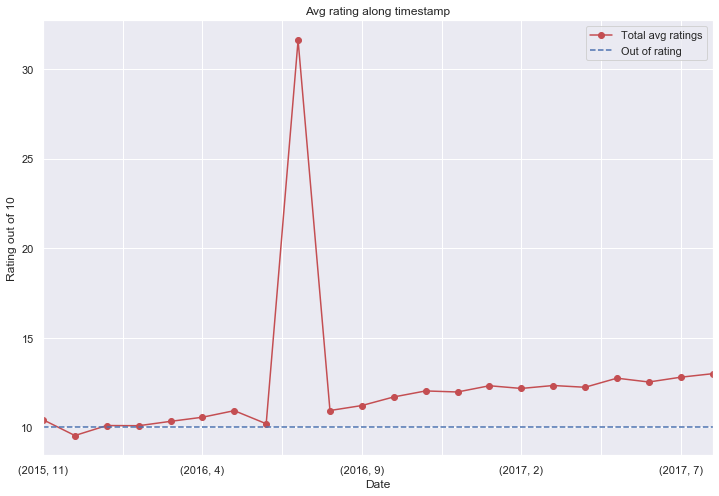

In [69]:
time_df = master_df.set_index('timestamp')
time_df.sort_index(inplace=True)
time_df = time_df.groupby([time_df.index.year, time_df.index.month]).rating_numerator.mean()
time_df.plot(style='-ro', figsize=(12,8), label='Total avg ratings')
plt.axhline(y=10.0, color='b', linestyle='--',label='Out of rating')
plt.title('Avg rating along timestamp')
plt.xlabel('Date')
plt.ylabel('Rating out of 10')
plt.legend()
plt.xticks()
plt.show()

-Now we take a look at `favorite_count` and `retweet_count` along `timestamp`

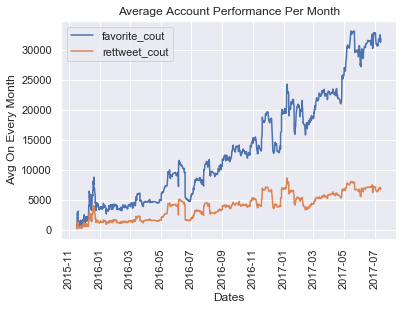

In [70]:
# set a 30 days rolling average for favorite count
y1= master_df.favorite_count.rolling(window = 30).mean()
# set a 30 days rolling average for retweet count
y2= master_df.retweet_count.rolling(window = 30).mean()
x = master_df.timestamp
plt.plot(x,y1, label='favorite_cout')
plt.plot(x,y2, label='rettweet_cout')
plt.xticks(rotation = 90)
plt.title('Average Account Performance Per Month')
plt.xlabel('Dates')
plt.ylabel('Avg On Every Month')
plt.legend()
plt.show()

-lets get the top `retweeted` and `favourite` dog tweet

In [71]:
#Function to get photos
def get_jpg(name):
    """ 
    get photo and numbers of the top of name after sorting descendingly.
    
    INPUT: name as one of our dataset columns
    ----------------------------------------------
    OUTPUT: 
            image saved from the jpg_url link
            print out the numbers for the top
    """
    top = master_df.loc[master_df[name].sort_values(ascending = False).index[0]]
    req = rq.get(top['jpg_url'])
    img = Image.open(BytesIO(req.content))
    img.save('images/' + f'top_{name}.jpg')
    print(f'Top {name} is: {top[name]}')
    plt.imshow(img)
    plt.axis('off')

Top favorite_count is: 132810


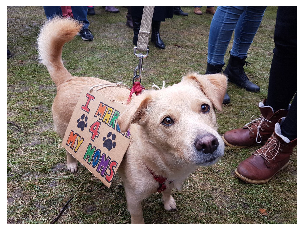

In [72]:
get_jpg('favorite_count')

Top retweet_count is: 79515


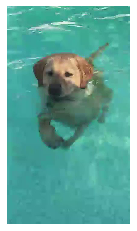

In [73]:
get_jpg('retweet_count')